# Machine Learning - Decision Tree 

### Imports

In [1]:
from scipy.io import loadmat
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz 
import graphviz

### Loading Data

In [3]:
# Load the params matrix 
data_parameters = loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_27_03_2022/Database_and_Matlab/27thMarch2022params.mat') 
# data_parameters = loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_21_03_2024/Database/21stMarch2024params.mat')
params = data_parameters['params']
columns = ['ext355', 'ext532', 'ext1064', 'back355', 'back532', 'back1064', 'pd355', 'pd532', 'pd1064']
df = pd.DataFrame(params, columns=columns)

# Load the Deviation Scores 2 vector 
data_deviationScores2 = loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_27_03_2022/Database_and_Matlab/27thMarch2022DeviationScores2.mat')
# data_deviationScores2 = loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_21_03_2024/Database/21stMarch2024_deviationScores2.mat')
devScores2 = data_deviationScores2['deviationScores2'].flatten() # 'flatten' because it was a double

# Add a new column to the data frame df with the scores  
df['score'] = devScores2 


In [5]:
df

,ext355,ext532,ext1064,back355,back532,back1064,pd355,pd532,pd1064,score
0,1,1,0,1,1,1,1,1,0,0.000000
1,0,1,0,0,0,1,0,1,0,3.207295
2,0,1,0,0,0,1,1,0,0,3.462771
3,0,1,0,0,0,1,1,1,0,2.917314
4,0,1,0,0,1,0,0,1,0,3.498624
...,...,...,...,...,...,...,...,...,...,...
73,1,1,0,1,1,0,1,0,0,0.360426
74,1,1,0,1,1,0,1,1,0,0.108174
75,1,1,0,1,1,1,0,0,0,3.854476
76,1,1,0,1,1,1,0,1,0,0.562856


### Prepare X (combinations --> features) and y (scores --> target output)

In [3]:
X = df.drop('score', axis=1)  # Drop the 'score' column to get features
y = df['score']  

### Split dataset into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None)

### Train the Decision Tree Model

In [4]:
tree_model = DecisionTreeRegressor(random_state=42)
# tree_model.fit(X_train, y_train)
tree_model.fit(X,y)

DecisionTreeRegressor(random_state=42)

### Analyze features importance 

In [5]:
# Analyze feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_}).sort_values(by='Importance', ascending=False) 

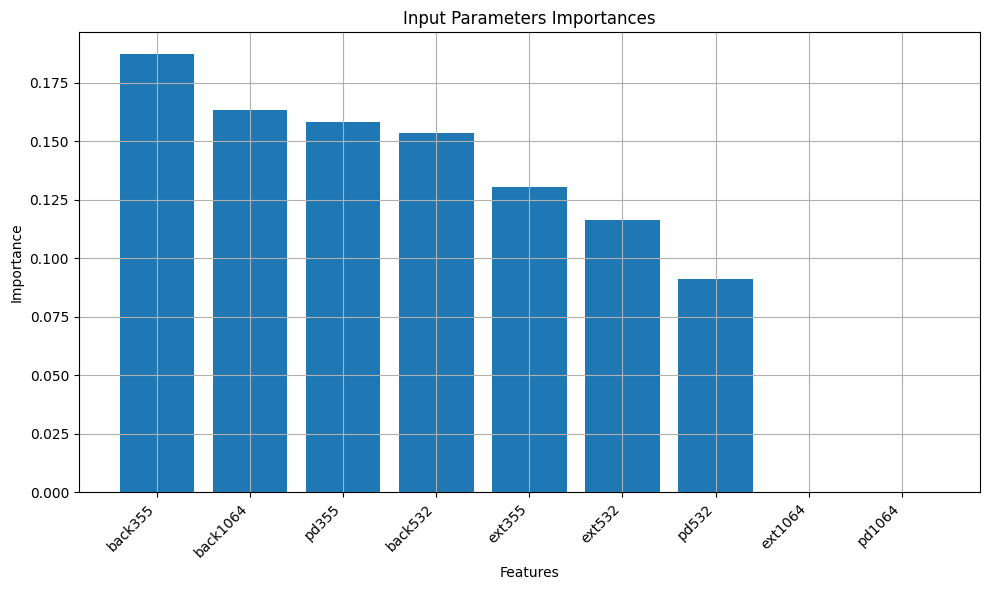

In [6]:
plt.figure(figsize=(10, 6))  
plt.bar(importance['Feature'], importance['Importance'])  
plt.xlabel('Features')  
plt.ylabel('Importance')  
plt.title('Input Parameters Importances')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.grid(True) 
plt.show()  

### Decision Tree Plot

In [7]:
export_graphviz(tree_model, out_file ='tree_21stMarch2024_ML.dot', 
               feature_names =['ext355', 'ext532', 'ext1064', 'back355', 'back532', 'back1064', 'pd355', 'pd532', 'pd1064']) 

In [8]:
export_graphviz(tree_model, out_file="tree_21stMarch2024_ML.dot", 
                feature_names=X.columns,
                class_names=["scores"],
                rounded=True, proportion=False, 
                precision=2, filled=True)

In [9]:
with open("tree_21stMarch2024_ML.dot") as f:
   dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render("tree_21stMarch2024_ML.dot", view=True)

'tree_21stMarch2024_ML.dot.pdf'

### Finding best max_depth

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=1)
regr_3 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1)
regr_4 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)
y_pred_3 = regr_3.predict(X_test)
y_pred_4 = regr_4.predict(X_test)

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual scores", alpha=0.7)
plt.scatter(range(len(y_pred_1)), y_pred_1, label="Predicted with max_depth=2", alpha=0.7)
plt.scatter(range(len(y_pred_2)), y_pred_2, label="Predicted with max_depth=5", alpha=0.7)
plt.scatter(range(len(y_pred_4)), y_pred_4, label="Predicted with max_depth=4", alpha=0.7)
plt.scatter(range(len(y_pred_3)), y_pred_3, label="Predicted with max_depth=3", alpha=0.7)
plt.title("Comparison of Decision Tree Regression at Different Depths")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()